In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Kiinteistovero.csv',encoding= 'unicode_escape')

In [3]:
df

,Alue,Asiakkaan oikeudellinen muoto,"2014 Maksuunpantu kiinteistövero yhteensä Kiinteistövero, euroa","2014 Maksuunpantu kiinteistövero yhteensä Verotusarvo, euroa",2014 Maksuunpantu kiinteistövero yhteensä Lukumäärä,"2014 20 000 - Kiinteistövero, euroa","2014 20 000 - Verotusarvo, euroa",2014 20 000 - Lukumäärä,"2014 5 000 - 19 999 Kiinteistövero, euroa","2014 5 000 - 19 999 Verotusarvo, euroa",...,2021 1 000 - 4 999 Lukumäärä,"2021 500 - 999 Kiinteistövero, euroa","2021 500 - 999 Verotusarvo, euroa",2021 500 - 999 Lukumäärä,"2021 170 - 499 Kiinteistövero, euroa","2021 170 - 499 Verotusarvo, euroa",2021 170 - 499 Lukumäärä,"2021 - 169 Kiinteistövero, euroa","2021 - 169 Verotusarvo, euroa",2021 - 169 Lukumäärä
0,000 - Koko maa,YHTEENSÄ,1535084557,-,2061137,627747303,-,6406,250331798,-,...,104205,129628206,16878268534,189513,306831774,43631956019,1025452,99622427,14325053069,944409
1,000 - Koko maa,Henkilöasiakkaat,490269177,-,1913279,1976393,-,41,5761121,-,...,37124,109848886,14091432988,163660,300025331,42758326265,1006045,98394275,13986698728,931064
2,000 - Koko maa,Asunto-osakeyhtiöt,313015269,-,82389,49941113,-,1675,152565844,-,...,45333,10487144,1790645736,13838,1683705,295172005,4535,69139,23752300,743
3,000 - Koko maa,Osakeyhtiöt,307052189,-,29136,236953621,-,1355,38837748,-,...,10770,5081509,534616299,6406,2838753,304844944,7917,582844,68942384,5815
4,000 - Koko maa,Keskinäiset kiinteistöosakeyhtiöt,201679118,-,12988,160848428,-,2163,27114040,-,...,5915,1459149,158448058,1940,337142,38521577,946,29348,3532879,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,992 - Äänekoski,Keskinäiset kiinteistöosakeyhtiöt,184581,-,32,..,..,..,..,..,...,20,..,..,..,..,..,..,-,-,-
3056,992 - Äänekoski,Muut kiinteistöosakeyhtiöt,203118,-,15,..,..,..,-,-,...,5,..,..,..,..,..,..,..,..,..
3057,992 - Äänekoski,Julkisyhteisöt ja niiden liikelaitokset,98757,-,5,..,..,..,-,-,...,..,-,-,-,..,..,..,-,-,-
3058,992 - Äänekoski,Seurakunnat,71112,-,7,..,..,..,-,-,...,..,..,..,..,-,-,-,-,-,-


### Jaetaan sarake "Alue" kahteen osaan ja siirretään uusi sarake "Koodi" eteen.

In [4]:
df[['Koodi', 'Alue']]=df['Alue'].str.split(' - ',1,expand=True)
col=df.pop('Koodi')
df.insert(0,col.name,col)

In [5]:
df

,Koodi,Alue,Asiakkaan oikeudellinen muoto,"2014 Maksuunpantu kiinteistövero yhteensä Kiinteistövero, euroa","2014 Maksuunpantu kiinteistövero yhteensä Verotusarvo, euroa",2014 Maksuunpantu kiinteistövero yhteensä Lukumäärä,"2014 20 000 - Kiinteistövero, euroa","2014 20 000 - Verotusarvo, euroa",2014 20 000 - Lukumäärä,"2014 5 000 - 19 999 Kiinteistövero, euroa",...,2021 1 000 - 4 999 Lukumäärä,"2021 500 - 999 Kiinteistövero, euroa","2021 500 - 999 Verotusarvo, euroa",2021 500 - 999 Lukumäärä,"2021 170 - 499 Kiinteistövero, euroa","2021 170 - 499 Verotusarvo, euroa",2021 170 - 499 Lukumäärä,"2021 - 169 Kiinteistövero, euroa","2021 - 169 Verotusarvo, euroa",2021 - 169 Lukumäärä
0,000,Koko maa,YHTEENSÄ,1535084557,-,2061137,627747303,-,6406,250331798,...,104205,129628206,16878268534,189513,306831774,43631956019,1025452,99622427,14325053069,944409
1,000,Koko maa,Henkilöasiakkaat,490269177,-,1913279,1976393,-,41,5761121,...,37124,109848886,14091432988,163660,300025331,42758326265,1006045,98394275,13986698728,931064
2,000,Koko maa,Asunto-osakeyhtiöt,313015269,-,82389,49941113,-,1675,152565844,...,45333,10487144,1790645736,13838,1683705,295172005,4535,69139,23752300,743
3,000,Koko maa,Osakeyhtiöt,307052189,-,29136,236953621,-,1355,38837748,...,10770,5081509,534616299,6406,2838753,304844944,7917,582844,68942384,5815
4,000,Koko maa,Keskinäiset kiinteistöosakeyhtiöt,201679118,-,12988,160848428,-,2163,27114040,...,5915,1459149,158448058,1940,337142,38521577,946,29348,3532879,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,992,Äänekoski,Keskinäiset kiinteistöosakeyhtiöt,184581,-,32,..,..,..,..,...,20,..,..,..,..,..,..,-,-,-
3056,992,Äänekoski,Muut kiinteistöosakeyhtiöt,203118,-,15,..,..,..,-,...,5,..,..,..,..,..,..,..,..,..
3057,992,Äänekoski,Julkisyhteisöt ja niiden liikelaitokset,98757,-,5,..,..,..,-,...,..,-,-,-,..,..,..,-,-,-
3058,992,Äänekoski,Seurakunnat,71112,-,7,..,..,..,-,...,..,..,..,..,-,-,-,-,-,-


### Valitaan rivit, jotka sisältävät kaikkien kiinteistöveron maksajien maksaman summan yhteensä alueittain.

In [6]:
yhteensä=df.loc[df['Asiakkaan oikeudellinen muoto']=='YHTEENSÄ']

In [7]:
yhteensä.head(20)

,Koodi,Alue,Asiakkaan oikeudellinen muoto,"2014 Maksuunpantu kiinteistövero yhteensä Kiinteistövero, euroa","2014 Maksuunpantu kiinteistövero yhteensä Verotusarvo, euroa",2014 Maksuunpantu kiinteistövero yhteensä Lukumäärä,"2014 20 000 - Kiinteistövero, euroa","2014 20 000 - Verotusarvo, euroa",2014 20 000 - Lukumäärä,"2014 5 000 - 19 999 Kiinteistövero, euroa",...,2021 1 000 - 4 999 Lukumäärä,"2021 500 - 999 Kiinteistövero, euroa","2021 500 - 999 Verotusarvo, euroa",2021 500 - 999 Lukumäärä,"2021 170 - 499 Kiinteistövero, euroa","2021 170 - 499 Verotusarvo, euroa",2021 170 - 499 Lukumäärä,"2021 - 169 Kiinteistövero, euroa","2021 - 169 Verotusarvo, euroa",2021 - 169 Lukumäärä
0,000,Koko maa,YHTEENSÄ,1535084557,-,2061137,627747303,-,6406,250331798,...,104205,129628206,16878268534,189513,306831774,43631956019,1025452,99622427,14325053069,944409
9,01,Uusimaa,YHTEENSÄ,492267074,-,318115,255243054,-,2919,93116112,...,35407,39574395,5183357441,57465,53289768,7634174398,168877,7553313,1199287300,71022
18,02,Varsinais-Suomi,YHTEENSÄ,122242439,-,200099,40228975,-,574,20946647,...,9156,12209143,1544050250,17914,28905433,4257269304,99126,9322046,1395618075,87198
27,04,Satakunta,YHTEENSÄ,62844998,-,111857,28484152,-,204,7712891,...,4020,4182713,603957786,6163,12871625,2073648678,46416,6201079,1001725124,59446
36,05,Kanta-Häme,YHTEENSÄ,47407311,-,88980,15579421,-,208,8125122,...,3386,4402183,575062943,6566,11994187,1658326377,42301,4089176,562118849,39500
45,06,Pirkanmaa,YHTEENSÄ,129620847,-,193312,47526471,-,640,24376086,...,8245,11112727,1451149997,16494,28021846,3986109522,95852,9319223,1283782845,90488
54,07,Päijät-Häme,YHTEENSÄ,56853985,-,87999,19604459,-,262,11343865,...,3644,5015981,635670884,7460,13824101,1853887498,47858,4209388,542956790,39879
63,08,Kymenlaakso,YHTEENSÄ,51306349,-,87038,19523935,-,196,8143214,...,2907,3635734,431368109,5472,10237187,1311177543,36256,3824570,490061903,36518
72,09,Etelä-Karjala,YHTEENSÄ,40176269,-,70979,15493855,-,137,5814979,...,2217,3057617,396226602,4581,9477856,1260480399,33217,3676483,475243333,34281
81,10,Etelä-Savo,YHTEENSÄ,45924614,-,120969,9857418,-,134,6107836,...,3329,5889798,651205051,8869,15044019,1716960654,52436,5256114,621119136,51638


## Valitaan vain rivit, jotka sisältävät kunnat.

In [8]:
kunnat=yhteensä.iloc[20:]

### Tulostetaan sarakkeiden nimet

In [9]:
list(kunnat.columns)

['Koodi',
 'Alue',
 'Asiakkaan oikeudellinen muoto',
 '2014 Maksuunpantu kiinteistövero yhteensä Kiinteistövero, euroa',
 '2014 Maksuunpantu kiinteistövero yhteensä Verotusarvo, euroa',
 '2014 Maksuunpantu kiinteistövero yhteensä Lukumäärä',
 '2014 20 000 - Kiinteistövero, euroa',
 '2014 20 000 - Verotusarvo, euroa',
 '2014 20 000 - Lukumäärä',
 '2014 5 000 - 19 999 Kiinteistövero, euroa',
 '2014 5 000 - 19 999 Verotusarvo, euroa',
 '2014 5 000 - 19 999 Lukumäärä',
 '2014 1 000 - 4 999 Kiinteistövero, euroa',
 '2014 1 000 - 4 999 Verotusarvo, euroa',
 '2014 1 000 - 4 999 Lukumäärä',
 '2014 500 - 999 Kiinteistövero, euroa',
 '2014 500 - 999 Verotusarvo, euroa',
 '2014 500 - 999 Lukumäärä',
 '2014 170 - 499 Kiinteistövero, euroa',
 '2014 170 - 499 Verotusarvo, euroa',
 '2014 170 - 499 Lukumäärä',
 '2014 - 169 Kiinteistövero, euroa',
 '2014 - 169 Verotusarvo, euroa',
 '2014 - 169 Lukumäärä',
 '2015 Maksuunpantu kiinteistövero yhteensä Kiinteistövero, euroa',
 '2015 Maksuunpantu kiinteistö

In [10]:
kunnat

,Koodi,Alue,Asiakkaan oikeudellinen muoto,"2014 Maksuunpantu kiinteistövero yhteensä Kiinteistövero, euroa","2014 Maksuunpantu kiinteistövero yhteensä Verotusarvo, euroa",2014 Maksuunpantu kiinteistövero yhteensä Lukumäärä,"2014 20 000 - Kiinteistövero, euroa","2014 20 000 - Verotusarvo, euroa",2014 20 000 - Lukumäärä,"2014 5 000 - 19 999 Kiinteistövero, euroa",...,2021 1 000 - 4 999 Lukumäärä,"2021 500 - 999 Kiinteistövero, euroa","2021 500 - 999 Verotusarvo, euroa",2021 500 - 999 Lukumäärä,"2021 170 - 499 Kiinteistövero, euroa","2021 170 - 499 Verotusarvo, euroa",2021 170 - 499 Lukumäärä,"2021 - 169 Kiinteistövero, euroa","2021 - 169 Verotusarvo, euroa",2021 - 169 Lukumäärä
180,020,Akaa,YHTEENSÄ,3208059,-,8760,341438,-,10,480093,...,332,353471,45880878,537,1101655,153406569,3942,399506,52252466,3957
189,005,Alajärvi,YHTEENSÄ,2117814,-,6630,393242,-,8,231228,...,175,250585,37339831,378,786570,123817382,2838,309942,46890064,3479
198,009,Alavieska,YHTEENSÄ,407273,-,1500,-,-,-,49276,...,32,58102,8834604,85,174355,28639082,625,73919,11792067,799
207,010,Alavus,YHTEENSÄ,2555502,-,8333,499494,-,8,325948,...,194,216736,36854168,317,755307,134571529,2830,461787,79405008,5113
216,016,Asikkala,YHTEENSÄ,2501603,-,9138,141941,-,5,161749,...,288,504923,61285676,755,1116482,146578327,3954,438108,59844789,4499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,977,Ylivieska,YHTEENSÄ,4246491,-,6635,1386513,-,24,689212,...,341,363306,45696953,556,1221634,159708284,4166,183671,22231269,1824
3024,980,Ylöjärvi,YHTEENSÄ,7467450,-,18263,988672,-,22,926789,...,636,742989,117493189,1116,2488153,436614566,9190,853748,137812685,8124
3033,981,Ypäjä,YHTEENSÄ,383929,-,2000,..,..,..,..,...,..,52016,7134253,80,175592,23903873,634,107470,13601753,1234
3042,989,Ähtäri,YHTEENSÄ,1825451,-,5293,335256,-,7,269645,...,153,193798,23821249,284,586786,74677998,2123,271339,35266522,2820


### Muunnetaan sarakkeiden sisältämät tiedot numeroiksi. 

In [11]:
kunnat.iloc[:,3:]=kunnat.iloc[:,3:].apply(pd.to_numeric,errors='coerce')

c:\users\ramie\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\ramie\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [12]:
kunnat.dtypes

Koodi                                                              object
Alue                                                               object
Asiakkaan oikeudellinen muoto                                      object
2014 Maksuunpantu kiinteistövero yhteensä Kiinteistövero, euroa    object
2014 Maksuunpantu kiinteistövero yhteensä Verotusarvo, euroa       object
                                                                    ...  
2021 170 - 499 Verotusarvo, euroa                                  object
2021 170 - 499 Lukumäärä                                           object
2021 - 169 Kiinteistövero, euroa                                   object
2021 - 169 Verotusarvo, euroa                                      object
2021 - 169 Lukumäärä                                               object
Length: 171, dtype: object

### Valitaan esimerkkinä Limingan tiedot

In [19]:
liminka=kunnat.loc[kunnat['Alue']=='Liminka']
liminka

,Koodi,Alue,Asiakkaan oikeudellinen muoto,"2014 Maksuunpantu kiinteistövero yhteensä Kiinteistövero, euroa","2014 Maksuunpantu kiinteistövero yhteensä Verotusarvo, euroa",2014 Maksuunpantu kiinteistövero yhteensä Lukumäärä,"2014 20 000 - Kiinteistövero, euroa","2014 20 000 - Verotusarvo, euroa",2014 20 000 - Lukumäärä,"2014 5 000 - 19 999 Kiinteistövero, euroa",...,2021 1 000 - 4 999 Lukumäärä,"2021 500 - 999 Kiinteistövero, euroa","2021 500 - 999 Verotusarvo, euroa",2021 500 - 999 Lukumäärä,"2021 170 - 499 Kiinteistövero, euroa","2021 170 - 499 Verotusarvo, euroa",2021 170 - 499 Lukumäärä,"2021 - 169 Kiinteistövero, euroa","2021 - 169 Verotusarvo, euroa",2021 - 169 Lukumäärä
1476,425,Liminka,YHTEENSÄ,1010987.0,NaN,4428.0,NaN,NaN,NaN,124970.0,...,88.0,82604.0,15806333.0,125.0,498739.0,108363449.0,2057.0,281253.0,60306840.0,2607.0


## Valitaan sarakkeet, joissa tietona on Maksuunpantu kiinteistövero yhteensä vuosittain
 - Vaihdetaan sarakkeiden nimet järkevämmiksi.

In [16]:
maksut=liminka.loc[:,['Maksuunpantu kiinteistövero yhteensä Kiinteistövero, euroa' in i for i in liminka.columns]]
maksut.columns=['2014','2015','2016','2017','2018','2019','2020','2021']
maksut

,2014,2015,2016,2017,2018,2019,2020,2021
1476,1010987.0,1181920.0,1188607.0,1205420.0,1261711.0,1323221.0,1332834.0,1438405.0


## Piirretään helppo kuvaaja

Text(0, 0.5, 'Maksuunpantu kiinteistövero yhteensä (€)')

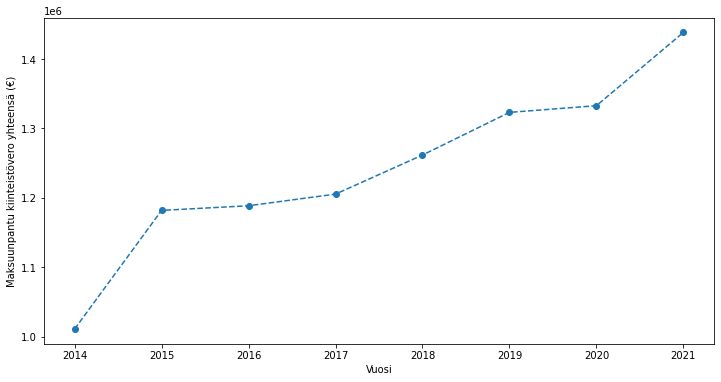

In [17]:
plt.figure(figsize=(12,6))
plt.plot(maksut.transpose(),marker='o',linestyle='dashed')
plt.xlabel('Vuosi')
plt.ylabel('Maksuunpantu kiinteistövero yhteensä (€)')
